# Data Wrangling, Assessing and Analyzing

In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
from scipy import stats
import tweepy

# Data Gathering

In [2]:
#loading the given file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#image prediction file download 

r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv',mode='w') as file:
    file.write(r.text)

# Create dataframe from TSV
df_img_pred= pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#twitter API log-ins
consumer_key = 'mTZ1VQbT2MY2KkksFEzqeuYOx'
consumer_secret = 'REw5un4cnQUQRkAw7cYglojDF4YMle5lkktJl7dkLEZ7jDrvNL'
access_token = '1145132417792897024-3Y2dTQZB7I33EaNgMma11MIayrLfLC'
access_secret = 'F7tQ4ie9OrqXqOQWZlBlHmskeVzW9yEGmKNsiPQjfp5dW'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
with open('tweet_json.txt', 'w') as f: 
    for tweet_id in df_twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id)
            # dumping the json content of the api format for each tweet to the text file
            json.dump(tweet._json, f,indent=2)
            f.write("\n")
            
        except:  # not found tweets
            print(f'tweet id:{tweet_id} not found')


tweet id:888202515573088257 not found
tweet id:873697596434513921 not found
tweet id:872668790621863937 not found
tweet id:872261713294495745 not found
tweet id:869988702071779329 not found
tweet id:866816280283807744 not found
tweet id:861769973181624320 not found
tweet id:856602993587888130 not found
tweet id:851953902622658560 not found
tweet id:845459076796616705 not found
tweet id:844704788403113984 not found
tweet id:842892208864923648 not found
tweet id:837366284874571778 not found
tweet id:837012587749474308 not found
tweet id:829374341691346946 not found
tweet id:827228250799742977 not found
tweet id:812747805718642688 not found
tweet id:802247111496568832 not found
tweet id:775096608509886464 not found
tweet id:770743923962707968 not found
tweet id:758740312047005698 not found
tweet id:758474966123810816 not found
tweet id:758467244762497024 not found
tweet id:758405701903519748 not found
tweet id:758355060040593408 not found
tweet id:758099635764359168 not found
tweet id:758

tweet id:736365877722001409 not found
tweet id:736225175608430592 not found
tweet id:736010884653420544 not found
tweet id:735991953473572864 not found
tweet id:735648611367784448 not found
tweet id:735635087207878657 not found
tweet id:735274964362878976 not found
tweet id:735256018284875776 not found
tweet id:735137028879360001 not found
tweet id:734912297295085568 not found
tweet id:734787690684657664 not found
tweet id:734776360183431168 not found
tweet id:734559631394082816 not found
tweet id:733828123016450049 not found
tweet id:733822306246479872 not found
tweet id:733482008106668032 not found
tweet id:733460102733135873 not found
tweet id:733109485275860992 not found
tweet id:732732193018155009 not found
tweet id:732726085725589504 not found
tweet id:732585889486888962 not found
tweet id:732375214819057664 not found
tweet id:732005617171337216 not found
tweet id:731285275100512256 not found
tweet id:731156023742988288 not found
tweet id:730924654643314689 not found
tweet id:730

tweet id:707014260413456384 not found
tweet id:706904523814649856 not found
tweet id:706901761596989440 not found
tweet id:706681918348251136 not found
tweet id:706644897839910912 not found
tweet id:706593038911545345 not found
tweet id:706538006853918722 not found
tweet id:706516534877929472 not found
tweet id:706346369204748288 not found
tweet id:706310011488698368 not found
tweet id:706291001778950144 not found
tweet id:706265994973601792 not found
tweet id:706169069255446529 not found
tweet id:706166467411222528 not found
tweet id:706153300320784384 not found
tweet id:705975130514706432 not found
tweet id:705970349788291072 not found
tweet id:705898680587526145 not found
tweet id:705786532653883392 not found
tweet id:705591895322394625 not found
tweet id:705475953783398401 not found
tweet id:705442520700944385 not found
tweet id:705428427625635840 not found
tweet id:705239209544720384 not found
tweet id:705223444686888960 not found
tweet id:705102439679201280 not found
tweet id:705

tweet id:690248561355657216 not found
tweet id:690021994562220032 not found
tweet id:690015576308211712 not found
tweet id:690005060500217858 not found
tweet id:689999384604450816 not found
tweet id:689993469801164801 not found
tweet id:689977555533848577 not found
tweet id:689905486972461056 not found
tweet id:689877686181715968 not found
tweet id:689835978131935233 not found
tweet id:689661964914655233 not found
tweet id:689659372465688576 not found
tweet id:689623661272240129 not found
tweet id:689599056876867584 not found
tweet id:689557536375177216 not found
tweet id:689517482558820352 not found
tweet id:689289219123089408 not found
tweet id:689283819090870273 not found
tweet id:689280876073582592 not found
tweet id:689275259254616065 not found
tweet id:689255633275777024 not found
tweet id:689154315265683456 not found
tweet id:689143371370250240 not found
tweet id:688916208532455424 not found
tweet id:688908934925697024 not found
tweet id:688898160958271489 not found
tweet id:688

tweet id:679148763231985668 not found
tweet id:679132435750195208 not found
tweet id:679111216690831360 not found
tweet id:679062614270468097 not found
tweet id:679047485189439488 not found
tweet id:679001094530465792 not found
tweet id:678991772295516161 not found
tweet id:678969228704284672 not found
tweet id:678800283649069056 not found
tweet id:678798276842360832 not found
tweet id:678774928607469569 not found
tweet id:678767140346941444 not found
tweet id:678764513869611008 not found
tweet id:678755239630127104 not found
tweet id:678740035362037760 not found
tweet id:678708137298427904 not found
tweet id:678675843183484930 not found
tweet id:678643457146150913 not found
tweet id:678446151570427904 not found
tweet id:678424312106393600 not found
tweet id:678410210315247616 not found
tweet id:678399652199309312 not found
tweet id:678396796259975168 not found
tweet id:678389028614488064 not found
tweet id:678380236862578688 not found
tweet id:678341075375947776 not found
tweet id:678

tweet id:673359818736984064 not found
tweet id:673355879178194945 not found
tweet id:673352124999274496 not found
tweet id:673350198937153538 not found
tweet id:673345638550134785 not found
tweet id:673343217010679808 not found
tweet id:673342308415348736 not found
tweet id:673320132811366400 not found
tweet id:673317986296586240 not found
tweet id:673295268553605120 not found
tweet id:673270968295534593 not found
tweet id:673240798075449344 not found
tweet id:673213039743795200 not found
tweet id:673148804208660480 not found
tweet id:672997845381865473 not found
tweet id:672995267319328768 not found
tweet id:672988786805112832 not found
tweet id:672984142909456390 not found
tweet id:672980819271634944 not found
tweet id:672975131468300288 not found
tweet id:672970152493887488 not found
tweet id:672968025906282496 not found
tweet id:672964561327235073 not found
tweet id:672902681409806336 not found
tweet id:672898206762672129 not found
tweet id:672884426393653248 not found
tweet id:672

tweet id:669037058363662336 not found
tweet id:669015743032369152 not found
tweet id:669006782128353280 not found
tweet id:669000397445533696 not found
tweet id:668994913074286592 not found
tweet id:668992363537309700 not found
tweet id:668989615043424256 not found
tweet id:668988183816871936 not found
tweet id:668986018524233728 not found
tweet id:668981893510119424 not found
tweet id:668979806671884288 not found
tweet id:668975677807423489 not found
tweet id:668967877119254528 not found
tweet id:668960084974809088 not found
tweet id:668955713004314625 not found
tweet id:668932921458302977 not found
tweet id:668902994700836864 not found
tweet id:668892474547511297 not found
tweet id:668872652652679168 not found
tweet id:668852170888998912 not found
tweet id:668826086256599040 not found
tweet id:668815180734689280 not found
tweet id:668779399630725120 not found
tweet id:668655139528511488 not found
tweet id:668645506898350081 not found
tweet id:668643542311546881 not found
tweet id:668

In [8]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [9]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,38841,8601,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


# Assessing 
we have three dateframes on hand to examine:

- tweet_json
- df_twitter_archive
- df_img_pred

In [13]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
print(df_twitter_archive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
print(df_img_pred.isnull().sum())
print('-------------------------------------------------------------------')
print(df_img_pred.info())
print('-------------------------------------------------------------------')
print(df_img_pred.describe())

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
-------------------------------------------------------------------
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000 

In [24]:
print(tweet_json.isnull().sum())
print('-------------------------------------------------------------------')
print(tweet_json.info())
print('-------------------------------------------------------------------')
print(tweet_json.describe(include='all'))

tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
source              0
retweeted_status    0
url                 0
dtype: int64
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
created_at          2345 non-null object
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(2), object(5)
memory usage: 128.3+ KB
None
-------------------------------------------------------------------
                  tweet_id  favorite_count  retweet_count  \
count                 2345     2345.000000    2345.000000   
unique                2345             NaN            NaN   
top     889531135344209921             NaN            NaN   
freq 

## 8 quality issues and 2 tidiness

### Tidiness

- gather all the data points in one dataframe
- retweet data related columns are not needed and has a tremendous amout of missing data and needs to be dropped 

### Quality

- Timestamp data type needs to be corrected
- rating denominator != 10 for certain rows
- ranting nominator outliers (>10)
- inconsistent caps in the names of the for the predicition columns p1,p2 and p3
- missing data under name column represented as None instead of Nan
- dog names columns caps are inconsistent 
- source column is not easily readable
- rating denominator and nominator date type needs to be changed from int to float to accept decimals 
- converting the tweet_id in the tweet_json df to float

In [37]:
#gather all the data points in one dataframe

master_df_clean = pd.merge(df_twitter_archive , df_img_pred,how = 'inner', on = 'tweet_id')


In [38]:
tweet_json['tweet_id']=tweet_json['tweet_id'].astype(float)

In [39]:
master_df_clean = pd.merge(master_df_clean, tweet_json, how = 'inner', on = 'tweet_id')

In [43]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 29 columns):
tweet_id              1347 non-null int64
timestamp             1347 non-null object
source_x              1347 non-null object
text                  1347 non-null object
expanded_urls         1347 non-null object
rating_numerator      1347 non-null int64
rating_denominator    1347 non-null int64
name                  1347 non-null object
doggo                 1347 non-null object
floofer               1347 non-null object
pupper                1347 non-null object
puppo                 1347 non-null object
jpg_url               1347 non-null object
img_num               1347 non-null int64
p1                    1347 non-null object
p1_conf               1347 non-null float64
p1_dog                1347 non-null bool
p2                    1347 non-null object
p2_conf               1347 non-null float64
p2_dog                1347 non-null bool
p3                    1347 non-null obj

In [42]:
cols=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
master_df_clean.drop(cols,axis=1,inplace=True)

In [45]:
#correcting the timestamp datatype
master_df_clean['timestamp']=pd.to_datetime(master_df_clean['timestamp'])

In [46]:
master_df_clean['rating_denominator'].value_counts()

10     1336
50        2
170       1
150       1
130       1
120       1
80        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [47]:
master_df_clean=master_df_clean[master_df_clean['rating_denominator']==10]

In [48]:
#dropping the rows where rating denominator != 10 
master_df_clean['rating_denominator'].value_counts()

10    1336
Name: rating_denominator, dtype: int64

In [49]:
#dropping the rows where rating nominator > 10 
master_df_clean=master_df_clean[master_df_clean['rating_numerator']<=10]

In [50]:
#fixing the inconsistent caps in the names colmun 
master_df_clean['name']=master_df_clean['name'].str.capitalize()

In [51]:
#correcting missing data under name column represented as None instead of Nan
master_df_clean['name'].replace('None', np.nan, inplace=True)

In [63]:
#making source column easily readable
master_df_clean['source_x'] = master_df_clean['source_x'].str.extract('>(.*)<')

In [66]:
#denominator and nominator data type change to floar to accept decimal values
master_df_clean[['rating_denominator','rating_numerator']]=master_df_clean[['rating_denominator','rating_numerator']].astype(float)

In [68]:
#dropping duplicated rows
master_df_clean.drop_duplicates(['tweet_id'],inplace=True)

In [70]:
master_df_clean.to_csv('twitter_archive_master.csv')

In [5]:
import pandas as pd
df=pd.read_csv('twitter_archive_master.csv')


In [39]:
pd.set_option('display.max_columns', None)

df.describe(include='all')

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
count,1.625000e+03,1625,1625.000000,1625.000000,1625,1625,1625.000000,1625.000000,1625.000000,1625.000000,1625,1625,1625.000000,1625.000000,1625.000000,1.625000e+03,1625.0,1625,1625,1625
unique,NaN,1625,NaN,NaN,828,5,NaN,NaN,NaN,NaN,1625,113,NaN,NaN,NaN,NaN,NaN,3,1,1625
top,NaN,This is Dexter. He breaks hearts for a living....,NaN,NaN,None,None,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,golden_retriever,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone,Original tweet,https://t.co/m6aC8d1Kzp
freq,NaN,1,NaN,NaN,404,1374,NaN,NaN,NaN,NaN,1,142,NaN,NaN,NaN,NaN,NaN,1596,1625,1
mean,7.383904e+17,NaN,11.389711,10.529231,NaN,NaN,2015.880615,6.980923,15.974154,10.803865,NaN,NaN,0.550108,8550.353231,2509.348308,6.831374e+06,103.0,NaN,NaN,NaN
std,6.831080e+16,NaN,8.014550,6.998630,NaN,NaN,0.698714,4.114016,8.833187,1.784010,NaN,NaN,0.300069,12037.131104,4311.226741,4.017456e+01,0.0,NaN,NaN,NaN
min,6.660209e+17,NaN,0.000000,10.000000,NaN,NaN,2015.000000,1.000000,1.000000,0.000000,NaN,NaN,0.000010,79.000000,13.000000,6.831118e+06,103.0,NaN,NaN,NaN
25%,6.769579e+17,NaN,10.000000,10.000000,NaN,NaN,2015.000000,3.000000,8.000000,10.000000,NaN,NaN,0.302200,2042.000000,607.000000,6.831338e+06,103.0,NaN,NaN,NaN
50%,7.106587e+17,NaN,11.000000,10.000000,NaN,NaN,2016.000000,7.000000,16.000000,11.000000,NaN,NaN,0.550506,4064.000000,1320.000000,6.831383e+06,103.0,NaN,NaN,NaN
75%,7.931204e+17,NaN,12.000000,10.000000,NaN,NaN,2016.000000,11.000000,24.000000,12.000000,NaN,NaN,0.822936,10637.000000,2898.000000,6.831389e+06,103.0,NaN,NaN,NaN


In [8]:
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,320,93,6831424,103,Twitter Web Client,Original tweet,https://t.co/6uLCWR9Efa
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,195,65,6831424,103,Twitter Web Client,Original tweet,https://t.co/uLzRi1drVK
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,264,101,6831424,103,Twitter Web Client,Original tweet,https://t.co/J4vn2rOYFk
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,549,237,6831424,103,Twitter Web Client,Original tweet,https://t.co/ITxxcc4v9y
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,2015,11,20,9.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,545,287,6831424,103,Twitter Web Client,Original tweet,https://t.co/5NhPV8E45i


In [53]:
df.sort_values('favorite_count',ascending=False).plot.barh(x='dog_type',y='favorite_count')

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1610,822872901745569793,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,2017,1,21,13.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,143519,49193,6831333,103,Twitter for iPhone,Original tweet,https://t.co/nTz3FtorBc
1405,744234799360020481,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,2016,6,18,13.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,128390,77435,6831382,103,Twitter for iPhone,Original tweet,https://t.co/7wE9LTEXC4
1570,866450705531457537,This is Jamesy. He gives a kiss to every other...,13.0,10.0,Jamesy,pupper,2017,5,22,13.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,124509,36549,6831329,103,Twitter for iPhone,Original tweet,https://t.co/wk7TfysWHr
145,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,13.0,10.0,Duddles,None,2017,6,26,13.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404,106074,44652,6831328,103,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY
1068,859196978902773760,We only rate dogs. This is quite clearly a smo...,12.0,10.0,quite,None,2017,5,2,12.0,https://pbs.twimg.com/ext_tw_video_thumb/85919...,malamute,0.216163,92645,31760,6831329,103,Twitter for iPhone,Original tweet,https://t.co/r6huxnDPOZ
1054,870374049280663552,This is Zoey. She really likes the planet. Wou...,13.0,10.0,Zoey,None,2017,6,1,13.0,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,83476,26902,6831329,103,Twitter for iPhone,Original tweet,https://t.co/6SWu4xkvDk
114,877736472329191424,This is Aja. She was just told she's a good do...,13.0,10.0,Aja,None,2017,6,22,13.0,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake_Bay_retriever,0.837956,80145,19414,6831328,103,Twitter for iPhone,Original tweet,https://t.co/lsPyyAiF1r
810,676219687039057920,This is Kenneth. He's stuck in a bubble. 10/10...,10.0,10.0,Kenneth,None,2015,12,14,10.0,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,whippet,0.000132,79101,33731,6831415,103,Twitter for iPhone,Original tweet,https://t.co/uQt37xlYMJ
142,884925521741709313,This is Earl. He found a hat. Nervous about wh...,12.0,10.0,Earl,None,2017,7,12,12.0,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Italian_greyhound,0.259916,77663,18609,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MYJvdlNRVa
1076,862096992088072192,We only rate dogs. Please don't send perfectly...,13.0,10.0,None,None,2017,5,10,13.0,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,chow,0.677589,76504,24339,6831329,103,Twitter for iPhone,Original tweet,https://t.co/nvZyyrp0kd


Text(0.5, 0, 'favorite count')

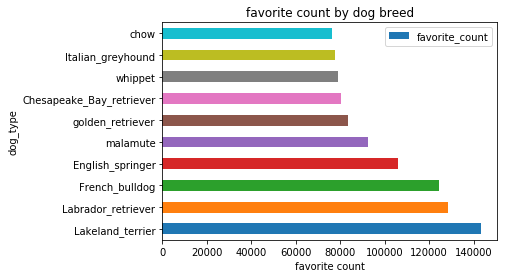

In [20]:
df.sort_values('favorite_count',ascending=False).head(10).plot.barh(x='dog_type',y='favorite_count')
plt.title('favorite count by dog breed')
plt.xlabel('favorite count')

# - insight 1

most popular dog breed by likes is a labrador retriever with an accurate prediction of %82.53 

Text(0.5, 0, 'retweet count')

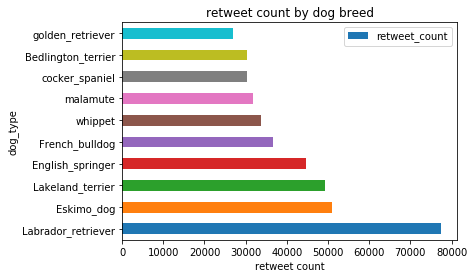

In [21]:
df.sort_values('retweet_count',ascending=False).head(10).plot.barh(x='dog_type',y='retweet_count')
plt.title('retweet count by dog breed')
plt.xlabel('retweet count')

# - insight 2

most dog breed that was retweeted at is also labrador retriever!

Text(0.5, 1.0, 'retweet count vs favorite_count')

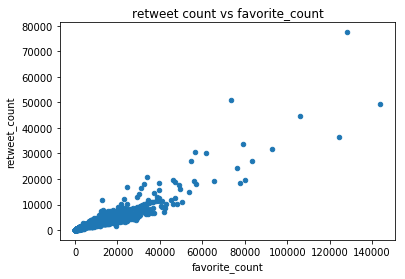

In [22]:
df.plot.scatter(x='favorite_count',y='retweet_count')
plt.title('retweet count vs favorite_count')


# - insight 3

there is an obvious up trend in the scatter plot (positive correlation) between retweet counts and favorite counts

Text(0.5, 0, 'rating_numerator')

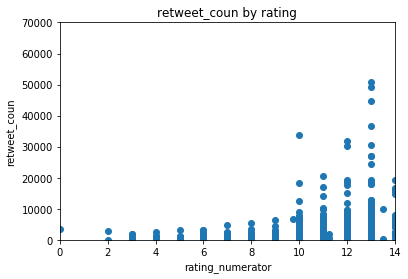

In [24]:
plt.scatter(x=df['rating_numerator'],y=df['retweet_count'])
plt.xlim(0,14)
plt.ylim(0,70000)
plt.title('retweet_coun by rating')
plt.ylabel('retweet_coun')
plt.xlabel('rating_numerator')

# - insight 4

we can tell from the scatter plot that the tweets with hight retweet tend to have a higher ratings 